# Passo 1

## Importações necessárias

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Leitura dos arquivos CSV

In [2]:
ratings_df = pd.read_csv("MovieLens_data/ratings.csv")
movies_df = pd.read_csv("MovieLens_data/movies.csv")
tags_df = pd.read_csv("MovieLens_data/tags.csv")
links_df = pd.read_csv("MovieLens_data/ratings.csv")

## Item 1: Obtenha uma visão geral dos dados

### a. O número de usuários e de itens (filmes)

In [3]:
# Número de usuários únicos
num_users = ratings_df['userId'].nunique()

# Número de filmes únicos
num_items = ratings_df['movieId'].nunique()

print(f"Números de usuários únicos: {num_users}")
print(f"Números de filmes únicos: {num_items}")

Números de usuários únicos: 610
Números de filmes únicos: 9724


### b. A esparsidade do conjunto de dados

In [4]:
'''
Esparsidade = 1 -(Número de avaliações / total possíveis de avaliações)

Onde: 

Número total de avaliações = total de linhas no arquivo ratings.csv
Total possíveis de avaliações = número de usários x número de filmes
'''

num_ratings = len(ratings_df)
total_possible_ratings = num_users * num_items
sparsity = 1 - (num_ratings / total_possible_ratings)

print(f"Esparsidade do conjunto de dados: {sparsity:.2%}")

Esparsidade do conjunto de dados: 98.30%


## Item 2: Obtenha informações dos usuários.

In [7]:
'''
As únicas informações disponíveis dos usuários são as avaliações feita por eles. 
Sendo assim, será por ela que tentarei mensurar e avaliar suas informações
'''

user_rating_counts = ratings_df['userId'].value_counts()
user_rating_counts.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: count, dtype: float64

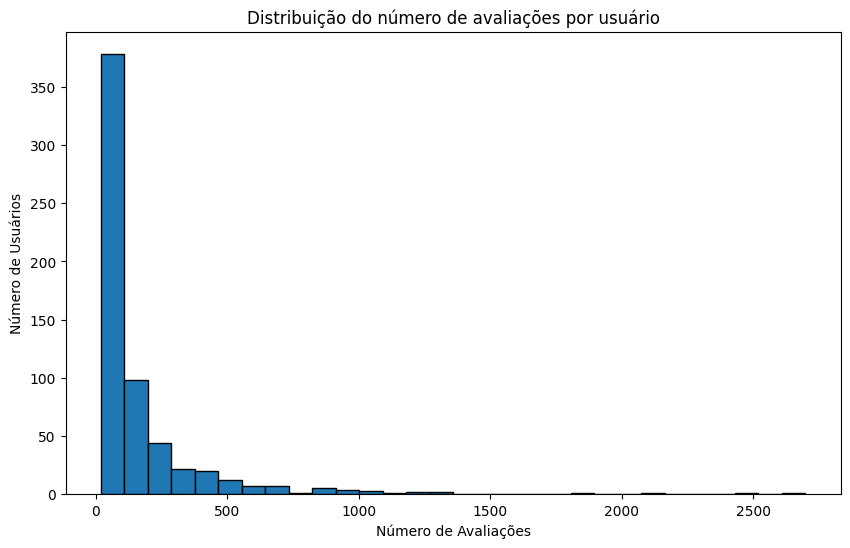

'\nAvaliação:\n- A maioria dos usuários avalia menos de 168 filmes.\n- Apenas um pequeno grupo de usuários é altamente ativo, avaliando centenas ou até milhares de filmes.\n- Há uma distribuição desigual nas avaliações: poucos usuários muito ativos e muitos usuários casuais que avaliam poucos filmes.\n'

In [9]:
# Histograma da distribuição de avaliações por usuário
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=30, edgecolor='black')
plt.title('Distribuição do número de avaliações por usuário')
plt.xlabel('Número de Avaliações')
plt.ylabel('Número de Usuários')
plt.show()

'''
Avaliação:
- A maioria dos usuários avalia menos de 168 filmes.
- Apenas um pequeno grupo de usuários é altamente ativo, avaliando centenas ou até milhares de filmes.
- Há uma distribuição desigual nas avaliações: poucos usuários muito ativos e muitos usuários casuais que avaliam poucos filmes.
'''

## Item 3:  Obtenha informações dos itens.

### 1. Distribuição por categorias (gêneros)

In [19]:
# Dividir os gêneros em múltiplas linhas
all_genres = movies_df['genres'].str.split('|').explode()

# Contar a frequência de cada gênero
genre_counts = Counter(all_genres)

genre_counts

Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

<Figure size 1200x600 with 0 Axes>

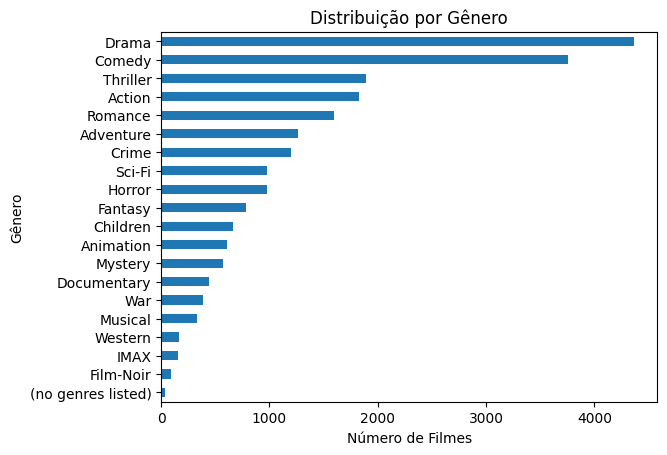

'\nInterpretação esperada:\n- Gêneros como Drama, Comedy e Action tendem a ser os mais comuns.\n- Alguns filmes podem não ter gênero listado, aparecendo como (no genres listed).\n'

In [25]:
# Converter o contador em um DataFrame
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])

# Plotar o gráfico de barras dos gêneros
plt.figure(figsize=(12, 6))

genre_df.sort_values('count', ascending=True).plot(kind='barh', legend=False)
plt.title('Distribuição por Gênero')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

'''
Interpretação esperada:
- Gêneros como Drama, Comedy e Action tendem a ser os mais comuns.
- Alguns filmes podem não ter gênero listado, aparecendo como (no genres listed).
'''

### 2. Distribuição de tags (tags.csv)

In [27]:
# Contar a frequência das tags
tag_counts = tags_df['tag'].value_counts()

# Mostrar as 10 tags mais comuns
print(tag_counts.head(10))


tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
surreal               23
funny                 23
Disney                23
religion              22
dark comedy           21
sci-fi                21
Name: count, dtype: int64


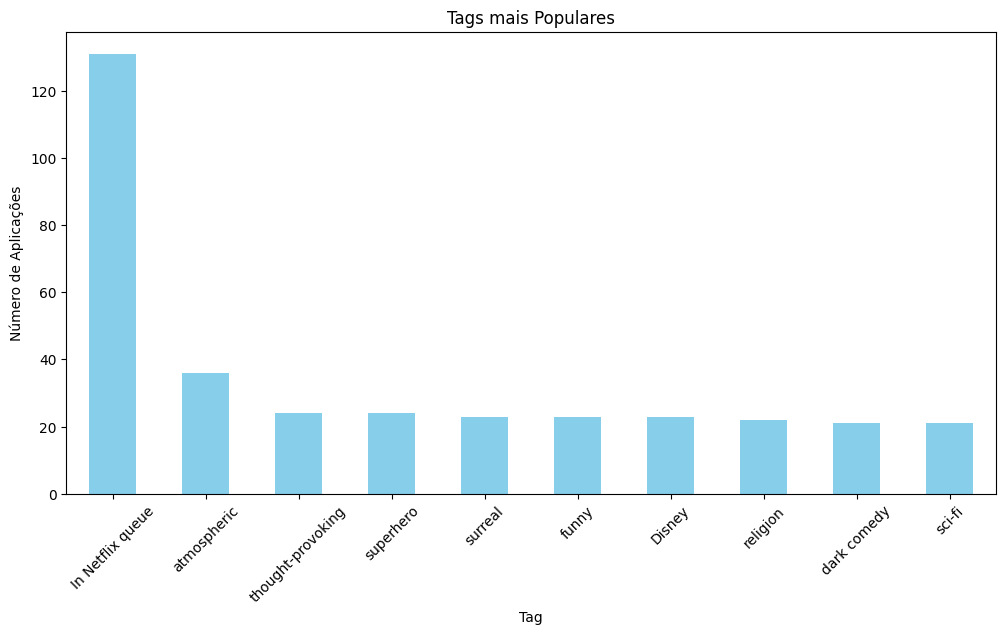

In [28]:
# Plotar um gráfico de barras para as tags mais comuns
plt.figure(figsize=(12, 6))
tag_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Tags mais Populares')
plt.xlabel('Tag')
plt.ylabel('Número de Aplicações')
plt.xticks(rotation=45)
plt.show()

### 3. Número médio de avaliações por filme

In [32]:
# Contar o número de avaliações por filme
movie_rating_counts = ratings_df['movieId'].value_counts()

# Calcular a média de avaliações por filme
avg_ratings_per_movie = movie_rating_counts.mean()

print(f'Média de avaliações por filme: {avg_ratings_per_movie:.2f}')

Média de avaliações por filme: 10.37
